In [1]:
import pandas as pd

# Load the dataset
file_path = "pump.csv"
df = pd.read_csv(file_path)

# Show basic information and first few rows
df_info = df.info()
df_head = df.head()
df.describe(), df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Vibration_g       500 non-null    float64
 1   Temperature_C     500 non-null    float64
 2   Pressure_In_Bar   500 non-null    float64
 3   Pressure_Out_Bar  500 non-null    float64
 4   Flow_Rate_Lpm     500 non-null    float64
 5   Motor_Current_A   500 non-null    float64
 6   RPM               500 non-null    int64  
 7   Fault_Type        500 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 31.4+ KB


(       Vibration_g  Temperature_C  Pressure_In_Bar  Pressure_Out_Bar  \
 count   500.000000     500.000000        500.00000        500.000000   
 mean      1.548920      90.141400          3.04128          3.819880   
 std       0.786612      17.108943          1.15536          1.274884   
 min       0.200000      60.100000          1.00000          1.510000   
 25%       0.900000      76.250000          2.05750          2.720000   
 50%       1.500000      89.100000          3.07500          3.925000   
 75%       2.250000     104.425000          4.09000          4.890000   
 max       3.000000     119.900000          4.98000          5.980000   
 
        Flow_Rate_Lpm  Motor_Current_A          RPM  
 count     500.000000       500.000000   500.000000  
 mean       60.259000        12.405040  1599.350000  
 std        23.938943         4.332486    87.136819  
 min        20.000000         5.000000  1451.000000  
 25%        37.875000         8.700000  1526.750000  
 50%        60.60

c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

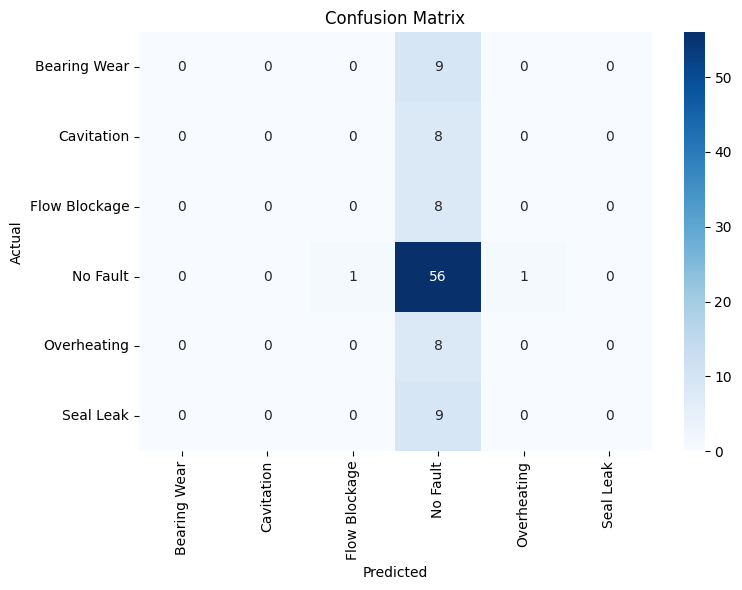

'               precision    recall  f1-score   support\n\n Bearing Wear       0.00      0.00      0.00         9\n   Cavitation       0.00      0.00      0.00         8\nFlow Blockage       0.00      0.00      0.00         8\n     No Fault       0.57      0.97      0.72        58\n  Overheating       0.00      0.00      0.00         8\n    Seal Leak       0.00      0.00      0.00         9\n\n     accuracy                           0.56       100\n    macro avg       0.10      0.16      0.12       100\n weighted avg       0.33      0.56      0.42       100\n'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop("Fault_Type", axis=1)
y = df["Fault_Type"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=le.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

report


In [3]:
import joblib

# Save the model and label encoder as a package
model_path = "pump_fault_model.pkl"
label_encoder_path = "label_encoder.pkl"

joblib.dump(model, model_path)
joblib.dump(le, label_encoder_path)

model_path, label_encoder_path


('pump_fault_model.pkl', 'label_encoder.pkl')

In [4]:
import joblib
import numpy as np

# Load model and label encoder
model = joblib.load("pump_fault_model.pkl")
le = joblib.load("label_encoder.pkl")

# Input sample
sample = np.array([[1.8, 95.2, 3.5, 4.0, 65.0, 12.5, 1600]])  # Replace with your values

# Predict
pred_encoded = model.predict(sample)
pred_label = le.inverse_transform(pred_encoded)

print("Predicted Fault Type:", pred_label[0])


Predicted Fault Type: No Fault


c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
import joblib
import numpy as np

# Load model and label encoder
model = joblib.load("pump_fault_model.pkl")
le = joblib.load("label_encoder.pkl")

# Define test samples
test_cases = {
    "Bearing Wear": [0.38,89.9,2.34,3.99,32.8,9.19,1712],
    "Cavitation": [2.05,100,4.92,3.84,84.9,8.99,1653],
    "Flow Blockage": [2.85,97.3,2.19,2.58,73.7,12.57,1545],
    "No Fault": [0.2, 70.0, 3.0, 3.5, 60.0, 9.0, 1700],
    "Overheating": [0.42,91.4,2.68,5.79,81.7,8.71,1671],
    "Seal Leak": [1.23,101.2,4.97,4.88,20.1,11.96,1546]
}

# Predict each case
for label, features in test_cases.items():
    sample = np.array(features).reshape(1, -1)
    prediction = model.predict(sample)
    fault_predicted = le.inverse_transform(prediction)[0]
    print(f"Expected: {label:15s} | Predicted: {fault_predicted}")


Expected: Bearing Wear    | Predicted: Bearing Wear
Expected: Cavitation      | Predicted: Cavitation
Expected: Flow Blockage   | Predicted: Flow Blockage
Expected: No Fault        | Predicted: No Fault
Expected: Overheating     | Predicted: Overheating
Expected: Seal Leak       | Predicted: Seal Leak


c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\saiki\AppData\Local\Programs\Python\Python313\Lib\site-packages\skl